In [1]:
import argparse
import math
from random import randint
import torch
from torch import nn, optim
from torchsummary import summary
from torch.utils.data import DataLoader
from data_preprocessing import Feature_Selector_Dataset
import discharge_model 
from SeversonDataset_preprocess import train_val_split
from utils import *

In [2]:
def get_args_parser():
    parser = argparse.ArgumentParser('Discharge Model Feature Selector Training', add_help=False)
    parser.add_argument('--batch_size', default=64, type=int)
    parser.add_argument('--epochs', default=100, type=int)
    parser.add_argument('--seed', default=41, type=int)
    parser.add_argument('--detail_step', default=50, type=int)

    # Model parameters
    parser.add_argument('--model_name', default='Dim_Reduction_2', type=str) 
    parser.add_argument('--pred_target', default='chargetime', type=str) 
    parser.add_argument('--finetune', default=False, type=bool)   
    parser.add_argument('--checkpoint', default='.pth', type=str)                  

    # Hyperparameters
    parser.add_argument('--weight_decay', type=float, default=1e-3)
    parser.add_argument('--lr', type=float, default=5e-4, metavar='LR')
    parser.add_argument('--lr_schedule', type=bool, default=False, metavar='LR')
    parser.add_argument('--min_lr', type=float, default=1e-5, metavar='LR')
    parser.add_argument('--warm_up', type=int, default=10, metavar='LR')
    parser.add_argument('--delta', type=int, default=1)

    return parser

 -- GPU is available -- 
(92, 6, 100)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [-1, 128, 500]           5,760
              Mish-2             [-1, 128, 500]               0
            Conv1d-3             [-1, 128, 500]         180,352
              Mish-4             [-1, 128, 500]               0
            Conv1d-5             [-1, 128, 500]          82,048
              Mish-6             [-1, 128, 500]               0
            Conv1d-7             [-1, 128, 500]          82,048
              Mish-8             [-1, 128, 500]               0
         AvgPool1d-9             [-1, 128, 250]               0
        AvgPool1d-10             [-1, 128, 250]               0
   SpatialDropout-11             [-1, 256, 250]               0
           Conv1d-12             [-1, 128, 250]          98,432
             Mish-13             [-1, 128, 250]               0
 

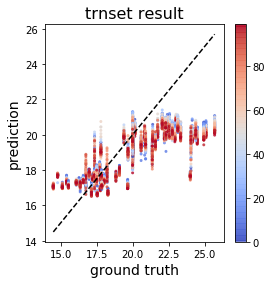

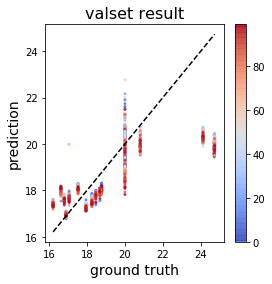

epoch:[11 / 100] batch:[50 / 144] loss: 0.206 lr: 5.000e-04
epoch:[11 / 100] batch:[100 / 144] loss: 0.281 lr: 5.000e-04
trn_loss: 0.207, val_loss: 0.186
real RMSE: 1.55, MAPE: 0.06
epoch:[12 / 100] batch:[50 / 144] loss: 0.278 lr: 5.000e-04
epoch:[12 / 100] batch:[100 / 144] loss: 0.254 lr: 5.000e-04
trn_loss: 0.224, val_loss: 0.210
real RMSE: 1.67, MAPE: 0.06
epoch:[13 / 100] batch:[50 / 144] loss: 0.284 lr: 5.000e-04
epoch:[13 / 100] batch:[100 / 144] loss: 0.219 lr: 5.000e-04
trn_loss: 0.215, val_loss: 0.180
real RMSE: 1.52, MAPE: 0.06
epoch:[14 / 100] batch:[50 / 144] loss: 0.171 lr: 5.000e-04
epoch:[14 / 100] batch:[100 / 144] loss: 0.358 lr: 5.000e-04
trn_loss: 0.224, val_loss: 0.218
real RMSE: 1.76, MAPE: 0.06
epoch:[15 / 100] batch:[50 / 144] loss: 0.292 lr: 5.000e-04
epoch:[15 / 100] batch:[100 / 144] loss: 0.228 lr: 5.000e-04
trn_loss: 0.230, val_loss: 0.222
real RMSE: 1.67, MAPE: 0.07
epoch:[16 / 100] batch:[50 / 144] loss: 0.252 lr: 5.000e-04
epoch:[16 / 100] batch:[100 / 

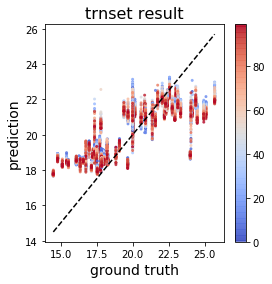

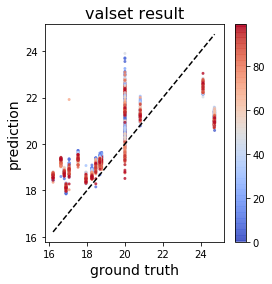

epoch:[21 / 100] batch:[50 / 144] loss: 0.177 lr: 5.000e-04
epoch:[21 / 100] batch:[100 / 144] loss: 0.201 lr: 5.000e-04
trn_loss: 0.241, val_loss: 0.239
real RMSE: 1.87, MAPE: 0.06
epoch:[22 / 100] batch:[50 / 144] loss: 0.165 lr: 5.000e-04
epoch:[22 / 100] batch:[100 / 144] loss: 0.224 lr: 5.000e-04
trn_loss: 0.200, val_loss: 0.184
real RMSE: 1.55, MAPE: 0.06
epoch:[23 / 100] batch:[50 / 144] loss: 0.292 lr: 5.000e-04
epoch:[23 / 100] batch:[100 / 144] loss: 0.109 lr: 5.000e-04
trn_loss: 0.283, val_loss: 0.248
real RMSE: 1.92, MAPE: 0.06
epoch:[24 / 100] batch:[50 / 144] loss: 0.238 lr: 5.000e-04
epoch:[24 / 100] batch:[100 / 144] loss: 0.318 lr: 5.000e-04
trn_loss: 0.303, val_loss: 0.241
real RMSE: 1.89, MAPE: 0.06
epoch:[25 / 100] batch:[50 / 144] loss: 0.201 lr: 5.000e-04
epoch:[25 / 100] batch:[100 / 144] loss: 0.229 lr: 5.000e-04
trn_loss: 0.265, val_loss: 0.223
real RMSE: 1.81, MAPE: 0.06
epoch:[26 / 100] batch:[50 / 144] loss: 0.131 lr: 5.000e-04
epoch:[26 / 100] batch:[100 / 

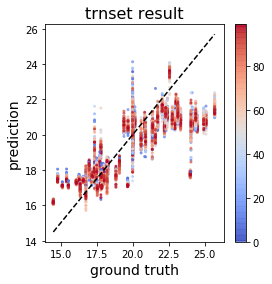

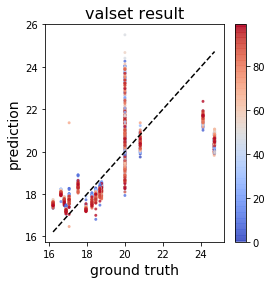

epoch:[31 / 100] batch:[50 / 144] loss: 0.193 lr: 5.000e-04
epoch:[31 / 100] batch:[100 / 144] loss: 0.177 lr: 5.000e-04
trn_loss: 0.218, val_loss: 0.218
real RMSE: 1.67, MAPE: 0.07
epoch:[32 / 100] batch:[50 / 144] loss: 0.153 lr: 5.000e-04
epoch:[32 / 100] batch:[100 / 144] loss: 0.188 lr: 5.000e-04
trn_loss: 0.226, val_loss: 0.211
real RMSE: 1.71, MAPE: 0.06
epoch:[33 / 100] batch:[50 / 144] loss: 0.138 lr: 5.000e-04
epoch:[33 / 100] batch:[100 / 144] loss: 0.198 lr: 5.000e-04
trn_loss: 0.232, val_loss: 0.249
real RMSE: 1.78, MAPE: 0.08
epoch:[34 / 100] batch:[50 / 144] loss: 0.218 lr: 5.000e-04
epoch:[34 / 100] batch:[100 / 144] loss: 0.187 lr: 5.000e-04
trn_loss: 0.188, val_loss: 0.197
real RMSE: 1.62, MAPE: 0.06
epoch:[35 / 100] batch:[50 / 144] loss: 0.148 lr: 5.000e-04
epoch:[35 / 100] batch:[100 / 144] loss: 0.200 lr: 5.000e-04
trn_loss: 0.247, val_loss: 0.266
real RMSE: 1.83, MAPE: 0.08
epoch:[36 / 100] batch:[50 / 144] loss: 0.139 lr: 5.000e-04
epoch:[36 / 100] batch:[100 / 

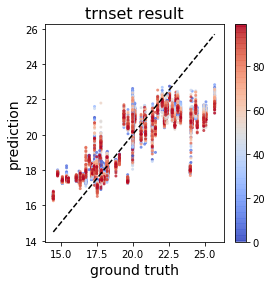

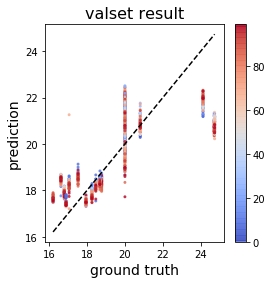

epoch:[41 / 100] batch:[50 / 144] loss: 0.218 lr: 5.000e-04
epoch:[41 / 100] batch:[100 / 144] loss: 0.187 lr: 5.000e-04
trn_loss: 0.220, val_loss: 0.206
real RMSE: 1.70, MAPE: 0.06
epoch:[42 / 100] batch:[50 / 144] loss: 0.235 lr: 5.000e-04
epoch:[42 / 100] batch:[100 / 144] loss: 0.244 lr: 5.000e-04
trn_loss: 0.185, val_loss: 0.188
real RMSE: 1.58, MAPE: 0.06
epoch:[43 / 100] batch:[50 / 144] loss: 0.282 lr: 5.000e-04
epoch:[43 / 100] batch:[100 / 144] loss: 0.162 lr: 5.000e-04
trn_loss: 0.222, val_loss: 0.214
real RMSE: 1.71, MAPE: 0.06
epoch:[44 / 100] batch:[50 / 144] loss: 0.155 lr: 5.000e-04
epoch:[44 / 100] batch:[100 / 144] loss: 0.145 lr: 5.000e-04
trn_loss: 0.189, val_loss: 0.213
real RMSE: 1.70, MAPE: 0.06
epoch:[45 / 100] batch:[50 / 144] loss: 0.162 lr: 5.000e-04
epoch:[45 / 100] batch:[100 / 144] loss: 0.197 lr: 5.000e-04
trn_loss: 0.189, val_loss: 0.207
real RMSE: 1.69, MAPE: 0.06
epoch:[46 / 100] batch:[50 / 144] loss: 0.208 lr: 5.000e-04
epoch:[46 / 100] batch:[100 / 

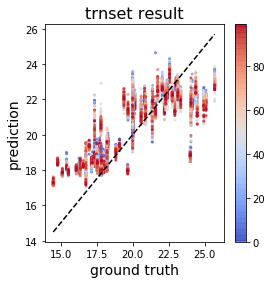

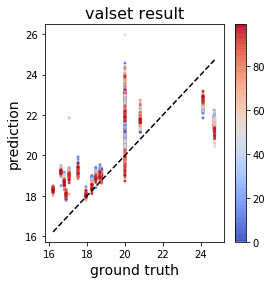

epoch:[51 / 100] batch:[50 / 144] loss: 0.184 lr: 5.000e-04
epoch:[51 / 100] batch:[100 / 144] loss: 0.204 lr: 5.000e-04
trn_loss: 0.237, val_loss: 0.227
real RMSE: 1.83, MAPE: 0.06
epoch:[52 / 100] batch:[50 / 144] loss: 0.182 lr: 5.000e-04
epoch:[52 / 100] batch:[100 / 144] loss: 0.178 lr: 5.000e-04
trn_loss: 0.213, val_loss: 0.219
real RMSE: 1.76, MAPE: 0.06
epoch:[53 / 100] batch:[50 / 144] loss: 0.158 lr: 5.000e-04
epoch:[53 / 100] batch:[100 / 144] loss: 0.281 lr: 5.000e-04
trn_loss: 0.206, val_loss: 0.244
real RMSE: 1.84, MAPE: 0.07
epoch:[54 / 100] batch:[50 / 144] loss: 0.144 lr: 5.000e-04
epoch:[54 / 100] batch:[100 / 144] loss: 0.174 lr: 5.000e-04
trn_loss: 0.186, val_loss: 0.197
real RMSE: 1.63, MAPE: 0.06
epoch:[55 / 100] batch:[50 / 144] loss: 0.186 lr: 5.000e-04
epoch:[55 / 100] batch:[100 / 144] loss: 0.157 lr: 5.000e-04
trn_loss: 0.193, val_loss: 0.202
real RMSE: 1.63, MAPE: 0.06
epoch:[56 / 100] batch:[50 / 144] loss: 0.150 lr: 5.000e-04
epoch:[56 / 100] batch:[100 / 

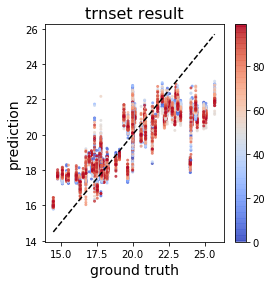

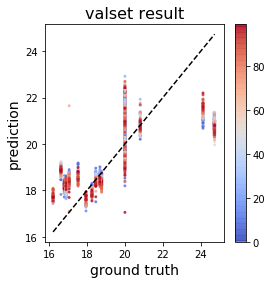

epoch:[61 / 100] batch:[50 / 144] loss: 0.120 lr: 5.000e-04
epoch:[61 / 100] batch:[100 / 144] loss: 0.248 lr: 5.000e-04
trn_loss: 0.196, val_loss: 0.219
real RMSE: 1.69, MAPE: 0.06
epoch:[62 / 100] batch:[50 / 144] loss: 0.121 lr: 5.000e-04
epoch:[62 / 100] batch:[100 / 144] loss: 0.204 lr: 5.000e-04
trn_loss: 0.190, val_loss: 0.199
real RMSE: 1.63, MAPE: 0.06
epoch:[63 / 100] batch:[50 / 144] loss: 0.124 lr: 5.000e-04
epoch:[63 / 100] batch:[100 / 144] loss: 0.225 lr: 5.000e-04
trn_loss: 0.187, val_loss: 0.209
real RMSE: 1.66, MAPE: 0.06
epoch:[64 / 100] batch:[50 / 144] loss: 0.144 lr: 5.000e-04
epoch:[64 / 100] batch:[100 / 144] loss: 0.142 lr: 5.000e-04
trn_loss: 0.228, val_loss: 0.221
real RMSE: 1.76, MAPE: 0.06
epoch:[65 / 100] batch:[50 / 144] loss: 0.145 lr: 5.000e-04
epoch:[65 / 100] batch:[100 / 144] loss: 0.172 lr: 5.000e-04
trn_loss: 0.193, val_loss: 0.223
real RMSE: 1.71, MAPE: 0.07
epoch:[66 / 100] batch:[50 / 144] loss: 0.183 lr: 5.000e-04
epoch:[66 / 100] batch:[100 / 

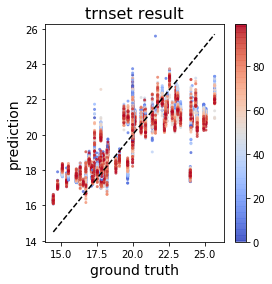

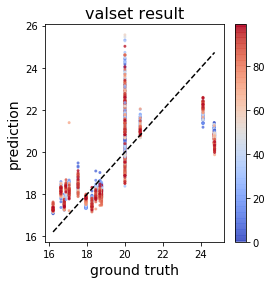

epoch:[71 / 100] batch:[50 / 144] loss: 0.194 lr: 5.000e-04
epoch:[71 / 100] batch:[100 / 144] loss: 0.257 lr: 5.000e-04
trn_loss: 0.174, val_loss: 0.202
real RMSE: 1.65, MAPE: 0.06
epoch:[72 / 100] batch:[50 / 144] loss: 0.182 lr: 5.000e-04
epoch:[72 / 100] batch:[100 / 144] loss: 0.152 lr: 5.000e-04
trn_loss: 0.179, val_loss: 0.212
real RMSE: 1.68, MAPE: 0.06
epoch:[73 / 100] batch:[50 / 144] loss: 0.226 lr: 5.000e-04
epoch:[73 / 100] batch:[100 / 144] loss: 0.187 lr: 5.000e-04
trn_loss: 0.199, val_loss: 0.253
real RMSE: 1.80, MAPE: 0.07
epoch:[74 / 100] batch:[50 / 144] loss: 0.152 lr: 5.000e-04
epoch:[74 / 100] batch:[100 / 144] loss: 0.205 lr: 5.000e-04
trn_loss: 0.178, val_loss: 0.233
real RMSE: 1.74, MAPE: 0.07
epoch:[75 / 100] batch:[50 / 144] loss: 0.165 lr: 5.000e-04
epoch:[75 / 100] batch:[100 / 144] loss: 0.216 lr: 5.000e-04
trn_loss: 0.180, val_loss: 0.213
real RMSE: 1.67, MAPE: 0.06
epoch:[76 / 100] batch:[50 / 144] loss: 0.190 lr: 5.000e-04
epoch:[76 / 100] batch:[100 / 

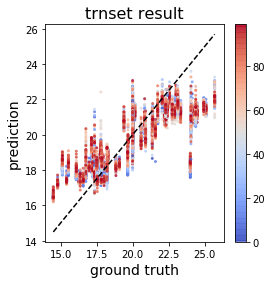

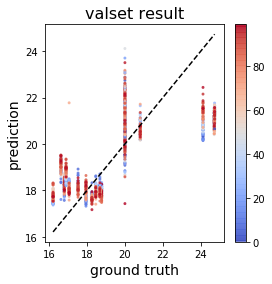

epoch:[81 / 100] batch:[50 / 144] loss: 0.191 lr: 5.000e-04
epoch:[81 / 100] batch:[100 / 144] loss: 0.107 lr: 5.000e-04
trn_loss: 0.276, val_loss: 0.340
real RMSE: 2.10, MAPE: 0.09
epoch:[82 / 100] batch:[50 / 144] loss: 0.248 lr: 5.000e-04
epoch:[82 / 100] batch:[100 / 144] loss: 0.128 lr: 5.000e-04
trn_loss: 0.190, val_loss: 0.220
real RMSE: 1.76, MAPE: 0.06
epoch:[83 / 100] batch:[50 / 144] loss: 0.186 lr: 5.000e-04
epoch:[83 / 100] batch:[100 / 144] loss: 0.208 lr: 5.000e-04
trn_loss: 0.188, val_loss: 0.218
real RMSE: 1.76, MAPE: 0.06
epoch:[84 / 100] batch:[50 / 144] loss: 0.154 lr: 5.000e-04
epoch:[84 / 100] batch:[100 / 144] loss: 0.154 lr: 5.000e-04
trn_loss: 0.195, val_loss: 0.240
real RMSE: 1.81, MAPE: 0.07
epoch:[85 / 100] batch:[50 / 144] loss: 0.165 lr: 5.000e-04
epoch:[85 / 100] batch:[100 / 144] loss: 0.120 lr: 5.000e-04
trn_loss: 0.197, val_loss: 0.255
real RMSE: 1.82, MAPE: 0.07
epoch:[86 / 100] batch:[50 / 144] loss: 0.195 lr: 5.000e-04
epoch:[86 / 100] batch:[100 / 

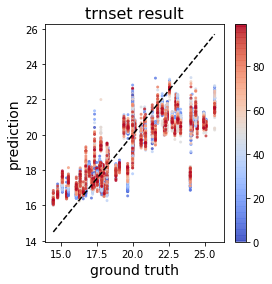

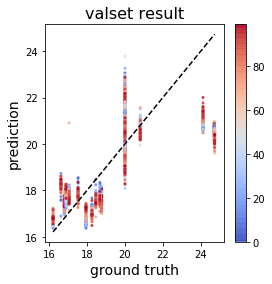

epoch:[91 / 100] batch:[50 / 144] loss: 0.137 lr: 5.000e-04
epoch:[91 / 100] batch:[100 / 144] loss: 0.168 lr: 5.000e-04
trn_loss: 0.180, val_loss: 0.224
real RMSE: 1.71, MAPE: 0.07
epoch:[92 / 100] batch:[50 / 144] loss: 0.173 lr: 5.000e-04
epoch:[92 / 100] batch:[100 / 144] loss: 0.141 lr: 5.000e-04
trn_loss: 0.180, val_loss: 0.229
real RMSE: 1.74, MAPE: 0.07
epoch:[93 / 100] batch:[50 / 144] loss: 0.185 lr: 5.000e-04
epoch:[93 / 100] batch:[100 / 144] loss: 0.260 lr: 5.000e-04
trn_loss: 0.171, val_loss: 0.221
real RMSE: 1.72, MAPE: 0.06
epoch:[94 / 100] batch:[50 / 144] loss: 0.193 lr: 5.000e-04
epoch:[94 / 100] batch:[100 / 144] loss: 0.181 lr: 5.000e-04
trn_loss: 0.183, val_loss: 0.223
real RMSE: 1.68, MAPE: 0.07
epoch:[95 / 100] batch:[50 / 144] loss: 0.156 lr: 5.000e-04
epoch:[95 / 100] batch:[100 / 144] loss: 0.164 lr: 5.000e-04
trn_loss: 0.173, val_loss: 0.212
real RMSE: 1.65, MAPE: 0.07
epoch:[96 / 100] batch:[50 / 144] loss: 0.129 lr: 5.000e-04
epoch:[96 / 100] batch:[100 / 

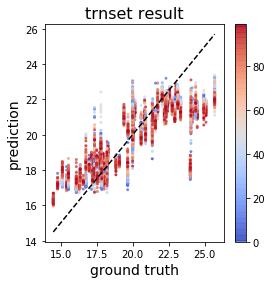

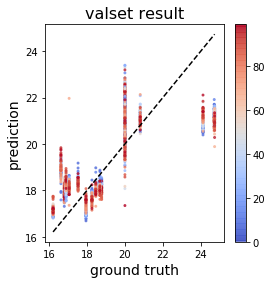

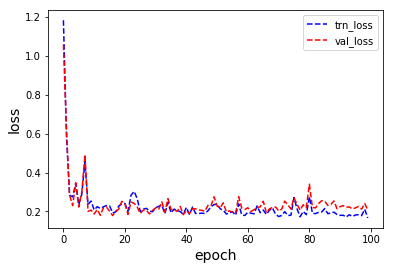

In [3]:
args = get_args_parser()
args, unknown = args.parse_known_args()
if torch.cuda.is_available():
    print(" -- GPU is available -- ")

# 根據random seed，隨機分割訓練及測試集
train_val_split(seed=args.seed)

trn_set = Feature_Selector_Dataset(train=True, pred_target=args.pred_target, part='discharge', norm=True)
val_set = Feature_Selector_Dataset(train=False, pred_target=args.pred_target, part='discharge', norm=True)
trn_loader = DataLoader(trn_set, batch_size=args.batch_size, num_workers=0, drop_last=False, shuffle=True)
val_loader = DataLoader(val_set, batch_size=args.batch_size, num_workers=0, drop_last=False, shuffle=False)

model = discharge_model.__dict__[args.model_name](4, 1, 0.2).apply(init_weights).cuda()
if args.finetune:
    model.load_state_dict(torch.load(args.checkpoint))
summary(model, (4, 500))

optimizer = optim.AdamW(model.parameters(), lr=args.lr, amsgrad=True, weight_decay=args.weight_decay)
criterion = nn.MSELoss()
criterion = nn.HuberLoss(delta=args.delta)

best_rmse = 1000
trn_loss_record, val_loss_record = [], []
for epoch in range(args.epochs):
    model.train()
    step = 0
    n_minibatch = math.ceil(len(trn_set)/args.batch_size)
    if args.lr_schedule:
        adjust_learning_rate(optimizer, args.epochs, epoch+1, args.warm_up, args.lr, args.min_lr)
    for inputs, targets in trn_loader:
        step += 1
        optimizer.zero_grad()
        outputs = model(inputs.cuda().float())
        loss = criterion(outputs, targets.reshape(-1, 1).cuda().float())
        loss.backward()
        optimizer.step()
        if step%args.detail_step==0:
            print('epoch:[%d / %d] batch:[%d / %d] loss: %.3f lr: %.3e' % (epoch+1, args.epochs, step, n_minibatch, loss, optimizer.param_groups[0]["lr"]))

    # model evaluation per epoch
    model.eval()
    with torch.no_grad():
        trn_loss, trn_batch = 0, 0
        for inputs, targets in trn_loader:
            output = model(inputs.cuda().float())
            loss = criterion(output, targets.reshape(-1, 1).cuda().float())
            trn_loss += loss
            trn_batch += 1
        val_loss, val_batch = 0, 0
        for inputs, targets in val_loader:
            output = model(inputs.cuda().float())
            loss = criterion(output, targets.reshape(-1, 1).cuda().float())
            val_loss += loss
            val_batch += 1
        trn_loss_record.append((trn_loss/trn_batch).cpu())
        val_loss_record.append((val_loss/val_batch).cpu())
        print('trn_loss: %.3f, val_loss: %.3f' % ((trn_loss/trn_batch), (val_loss/val_batch)))

    # inverse transform to real target
    rmse, mape = real_RMSE_and_MAPE(model, val_loader, args.pred_target)
    print('real RMSE: %.2f, MAPE: %.2f' % (rmse, mape))
    if (epoch+1)%10 == 0:
        pred_result(model, trn_set, 'trn', args.pred_target)        
        pred_result(model, val_set, 'val', args.pred_target)
torch.save(model.state_dict(), args.model_name+'_seed'+str(args.seed)+'.pth')

# training finished
loss_profile(trn_loss_record, val_loss_record)